In [1]:
import pandas as pd

In [2]:
# get the filtered dataset
df = pd.read_csv('../../datasets/built_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737337 entries, 0 to 737336
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    737337 non-null  object 
 1   Category Name                737337 non-null  object 
 2   Date                         737337 non-null  object 
 3   Time                         737337 non-null  object 
 4   Item Code                    737337 non-null  int64  
 5   Quantity Sold (kilo)         737337 non-null  float64
 6   Unit Selling Price (RMB/kg)  737337 non-null  float64
 7   Sale or Return               737337 non-null  object 
 8   Discount (Yes/No)            737337 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 50.6+ MB


In [3]:
df = df.drop(columns=['Item Code', 'Time', 'Discount (Yes/No)'])
df.sample(2)

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return
710873,xixia black mushroom,mushroom,2023-05-08,0.176,21.6,sale
604816,honghu lotus root powder,aquatic,2022-11-10,1.000,6.5,sale


In [4]:
import numpy as np

In [5]:
# average frequecy of selling item
np.average(df['Item Name'].value_counts())

3860.4031413612565

In [6]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x11e46ec70>,
 'caps': [<matplotlib.lines.Line2D at 0x11e4ce1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e46e9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11e4ce730>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e4ce9d0>],
 'means': []}

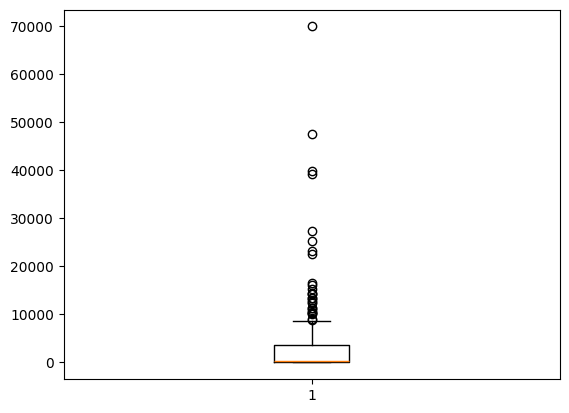

In [7]:
# visualise frequecy of selling item
plt.boxplot(df['Item Name'].value_counts())

In [8]:
# average frequency of selling category
np.average(df['Category Name'].value_counts())

122889.5

{'whiskers': [<matplotlib.lines.Line2D at 0x11e5a0070>,
 'caps': [<matplotlib.lines.Line2D at 0x11e5a05b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e592d90>],
 'medians': [<matplotlib.lines.Line2D at 0x11e5a0af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e5a0d90>],
 'means': []}

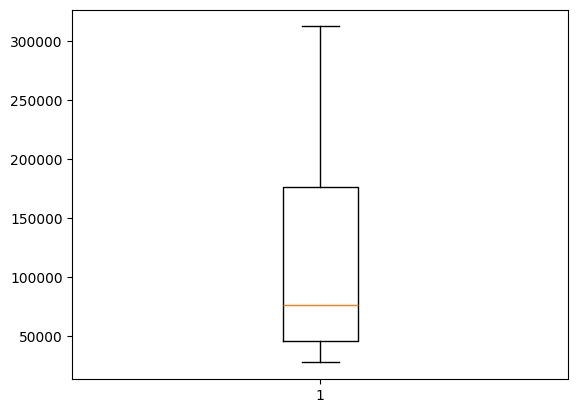

In [9]:
# visualise frequency of selling category
plt.boxplot(df['Category Name'].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x11e60a610>,
 'caps': [<matplotlib.lines.Line2D at 0x11e60ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e60a370>],
 'medians': [<matplotlib.lines.Line2D at 0x11e61d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e61d370>],
 'means': []}

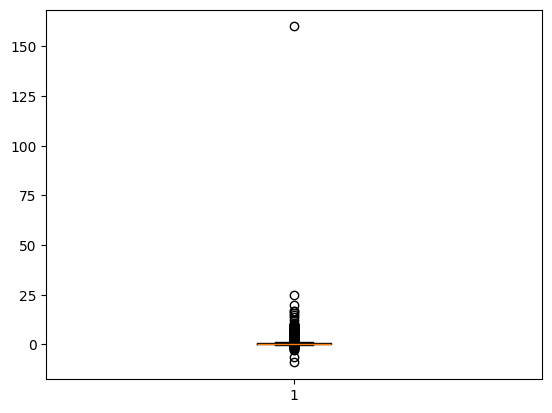

In [10]:
# check for outliers
plt.boxplot(df['Quantity Sold (kilo)'])

In [11]:
# check the - values of sold amount are returned values
(df['Quantity Sold (kilo)'] < 0).sum() == (df['Sale or Return'] == 'return').sum()

True

In [12]:
# remove non-dependent values for the prediction
df = df[~(df['Sale or Return'] == 'return')]
df = df.drop(columns=['Sale or Return'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736947 entries, 0 to 737336
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    736947 non-null  object 
 1   Category Name                736947 non-null  object 
 2   Date                         736947 non-null  object 
 3   Quantity Sold (kilo)         736947 non-null  float64
 4   Unit Selling Price (RMB/kg)  736947 non-null  float64
dtypes: float64(2), object(3)
memory usage: 33.7+ MB


In [13]:
np.mean(df['Quantity Sold (kilo)'])

0.5004181643998823

In [14]:
# round up sold amount to first decimal place
df['Quantity Sold (kilo)'] = round(df['Quantity Sold (kilo)'], 1)

In [15]:
# check the change of mean
np.mean(df['Quantity Sold (kilo)'])

0.5024228336637506

In [16]:
df.head()

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
0,paopaojiao,capsicum,2020-07-01,0.4,7.6
1,paopaojiao,capsicum,2020-07-01,0.4,7.6
2,shanghaiqing,flower,2020-07-01,0.4,10.0
3,caixin,flower,2020-07-01,0.5,8.0
4,paopaojiao,capsicum,2020-07-01,0.3,7.6


{'whiskers': [<matplotlib.lines.Line2D at 0x11e695040>,
 'caps': [<matplotlib.lines.Line2D at 0x11e695580>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e686e80>],
 'medians': [<matplotlib.lines.Line2D at 0x11e695ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e695d60>],
 'means': []}

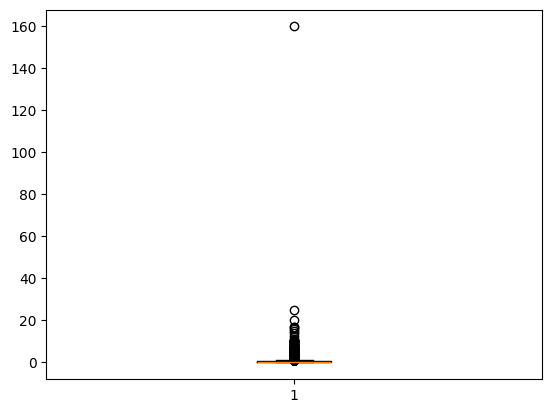

In [17]:
# check for sold amount outliers
plt.boxplot(df['Quantity Sold (kilo)'])

In [18]:
(df['Quantity Sold (kilo)'] > 20).sum(), (df['Quantity Sold (kilo)'] < 0).sum()

(2, 0)

In [19]:
np.mean(df['Quantity Sold (kilo)'])

0.5024228336637506

In [20]:
# handle outliers with mean values
df['Quantity Sold (kilo)'] = np.where(df['Quantity Sold (kilo)'] > 20, np.mean(df['Quantity Sold (kilo)']), df['Quantity Sold (kilo)'])
np.mean(df['Quantity Sold (kilo)']), df['Quantity Sold (kilo)'].max()

(0.5021731614969154, 20.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x11e751070>,
 'caps': [<matplotlib.lines.Line2D at 0x11e7515b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e743d90>],
 'medians': [<matplotlib.lines.Line2D at 0x11e751af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e751d90>],
 'means': []}

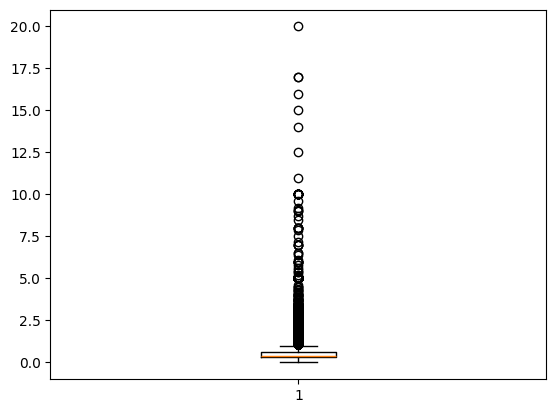

In [21]:
# visualise processed sold amount
plt.boxplot(df['Quantity Sold (kilo)'])

In [22]:
# group dataset by item name, category and date
df = df.groupby(['Item Name', 'Category Name', 'Date']).mean().reset_index()
df.head()

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
0,7 colour pepper,capsicum,2020-07-01,0.380,16.0
1,7 colour pepper,capsicum,2020-07-02,0.340,14.0
2,7 colour pepper,capsicum,2020-07-03,0.425,14.0
3,7 colour pepper,capsicum,2020-07-04,0.350,14.0
4,7 colour pepper,capsicum,2020-07-05,0.280,14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x11e7d0700>,
 'caps': [<matplotlib.lines.Line2D at 0x11e7d0c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e7c3910>],
 'medians': [<matplotlib.lines.Line2D at 0x11e736ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e7d0f10>],
 'means': []}

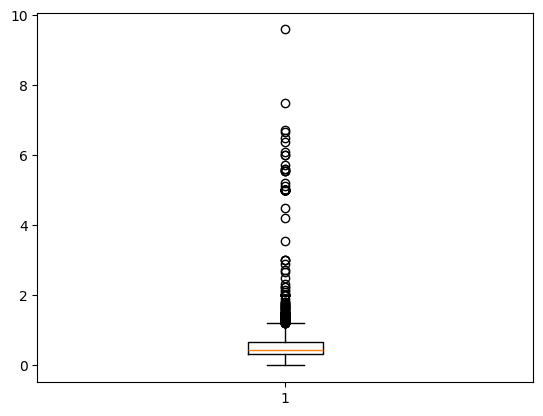

In [23]:
# visualise processed sold amount
plt.boxplot(df['Quantity Sold (kilo)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x11e8433a0>,
 'caps': [<matplotlib.lines.Line2D at 0x11e8438e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e843100>],
 'medians': [<matplotlib.lines.Line2D at 0x11e843e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e853100>],
 'means': []}

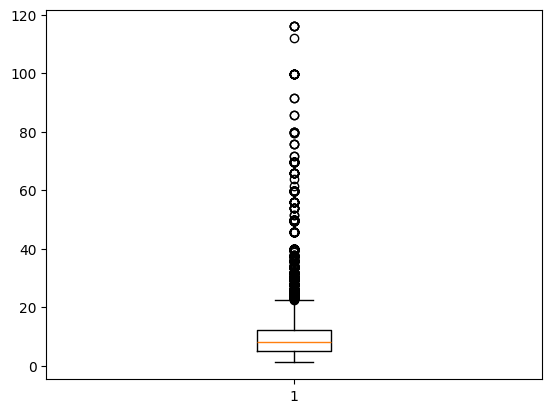

In [24]:
plt.boxplot(df['Unit Selling Price (RMB/kg)'])

In [25]:
df.sample(3)

,Item Name,Category Name,Date,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
20422,net lotus root,aquatic,2023-02-07,0.600000,4.8
16530,luosi pepper,capsicum,2023-05-08,1.000000,7.5
2321,caixin,flower,2020-07-02,0.414286,8.0


In [26]:
# drop non-dependent columns
df = df.drop(columns='Date')

In [27]:
# view co-relation between price and sold amount
df.iloc[:,[2, 3]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
Quantity Sold (kilo),1.000000,-0.435721
Unit Selling Price (RMB/kg),-0.435721,1.000000


In [28]:
# one hot encoding
df = pd.get_dummies(df)
df.shape

(37978, 199)

In [29]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_artemisia stelleriana,Item Name_basil,...,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
1251,0.330000,8.0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
406,0.362500,8.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25609,0.511111,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
30191,0.300000,10.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8424,0.300000,9.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
# save pre-processed dataset
df.to_csv('../../datasets/pre_processed_dataset.csv', index=False)